# <font color=black>**Veri Ön İşleme**</font>

* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Tek Değişkenli Aykırı Gözlem Analizi](#tek_aykiri_gozlem_analizi)
* [Çok Değişkenli Aykırı Gözlem Analizi](#cok_aykiri_gozlem_analizi)
* [Eksik Veri Analizi](#eksik_veri_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)
* [Aykırı Gözlem Analizi](#aykiri_gozlem_analizi)

***
##  <font color=red>**Aykırı Gözlem Analizi**</font> <a id="aykiri_gozlem_analizi"></a>

***

**Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.**

#### **Aykırı Değer Nedir?**

Aykırılığı ifade eden nümerik değere **aykırı değer**(outliers) denir.

#### **Aykırı Gözlem Nedir?**

Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

#### **Aykırı Değer Neye Sebep olur?**

**Genellenebilirlik** kaygısı ile oluşturulan **kural setlerini** ya da **fonksiyonları** yanıltır. **Yanlılığa** sebep olur.


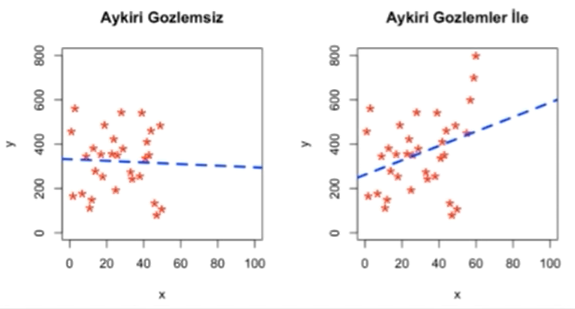

* Eğim negatif yönlü iken, aykırı gözlem yüzünden pozitif yöne kaymış.
#### **Neye Göre Belirlenir?**

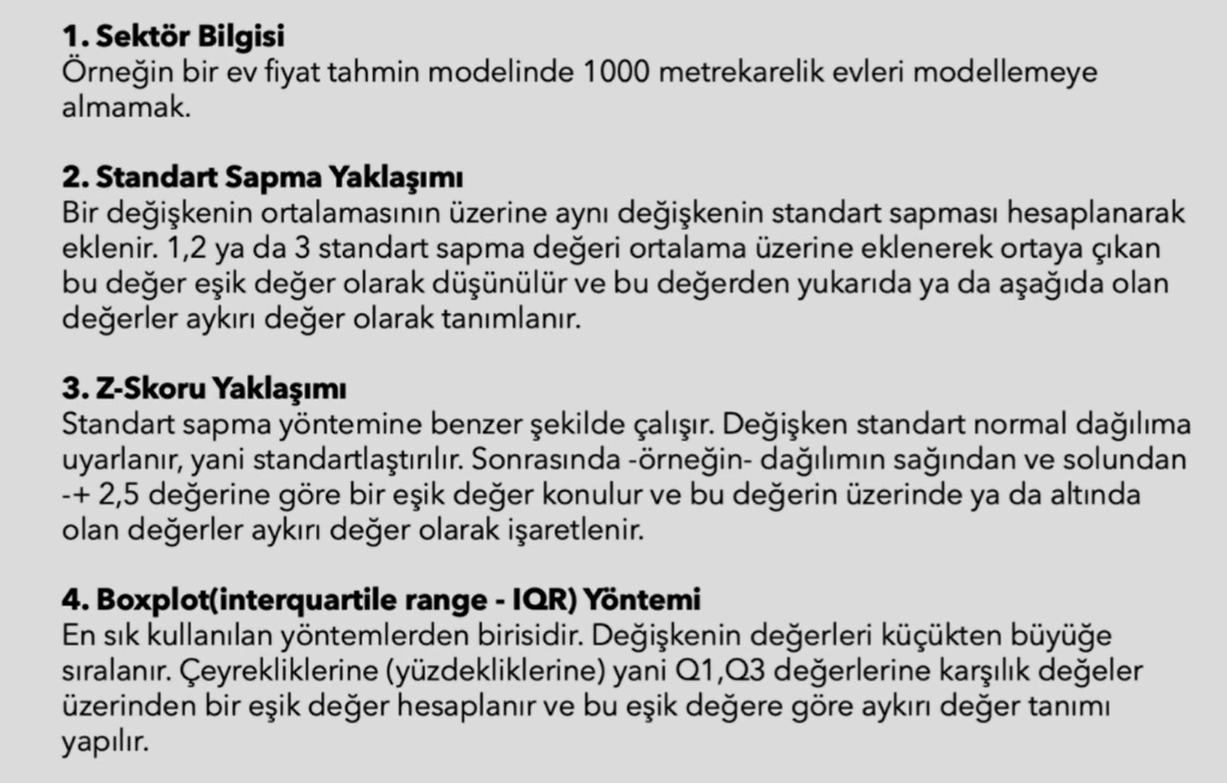

***
##  <font color=red>**Tek Değişkenli Aykırı Gözlem Analizi**</font> <a id="tek_aykiri_gozlem_analizi"></a>

***

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) # sadece tipi float ve int olanları alır.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df['table'].copy()

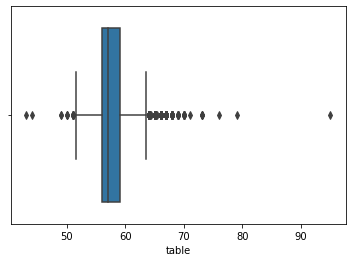

In [3]:
sns.boxplot(x=df_table);

#### Eşik Değerlerin Hesaplanması
**interquantile yöntemi kullanılır**
* Öncelikle quantile'lar çıkarılır(75'lik ve 25'lik şekilde)
* Daha sonra %75'likten %25'lik çıkartılır. Çıkan değere IQR denir.
* Alt sınır için Q1'den 1.5*IQR çıkartılır.
* Üst sınır için Q3'e 1.5*IQR eklenir.

In [4]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

print("Alt sınır: ", alt_sinir)
print("Üst sınır: ", ust_sinir)

Alt sınır:  51.5
Üst sınır:  63.5


#### Aykırı Değerlerin Sorgulanması

In [5]:
(df_table < alt_sinir) | (df_table > ust_sinir) # vektör düzeyinde aykırı değer sorgulaması

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
df_table < alt_sinir

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [7]:
aykiri_tf = (df_table < alt_sinir)

In [8]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [9]:
aykirilar = df_table[aykiri_tf]
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### Aykırı Değer Probleminin Çözülmesi

In [10]:
import pandas as pd

In [11]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [12]:
type(df_table)

pandas.core.series.Series

In [13]:
df_table.shape

(53940,)

#### * Aykırı Değerleri Silmek

In [14]:
df_table = df_table.values.reshape(-1, 1) # Hatanın çözümü 

In [15]:
temiz_df_table = df_table[~((df_table < alt_sinir)|(df_table>ust_sinir)).any(axis=1)]  # ~ işareti dışında kalanlar anlamına geliyor

In [16]:
temiz_df_table.shape

(53335, 1)

#### * Aykırı Değerleri Ortalama ile Doldurmak

In [17]:
df_table = df['table'].copy() #üzerinde değişiklikler oldu nolur nolmaz diye yeniden oluştururuz 

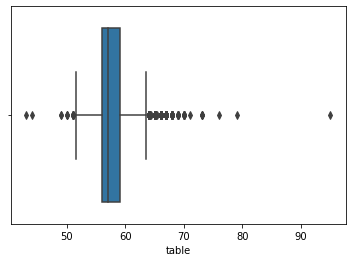

In [18]:
sns.boxplot(x=df_table);

In [19]:
df_table.mean()

57.45718390804603

In [20]:
aykiri_tf = ((df_table < alt_sinir) | (df_table > ust_sinir))

In [21]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [22]:
df_table[aykiri_tf] = df_table.mean()

In [23]:
df_table[aykiri_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

std küçüldü

In [25]:
df_table.describe()

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

#### *Aykırı Değerleri Baskılama Yöntemi ile Doldurmak

In [26]:
df_table = df['table'].copy() #üzerinde değişiklikler oldu nolur nolmaz diye yeniden oluştururuz 

In [27]:
alt_aykiri_tf = df_table < alt_sinir
ust_aykiri_tf = df_table > ust_sinir

In [28]:
df_table[alt_aykiri_tf] = alt_sinir

In [29]:
df_table[ust_aykiri_tf] = ust_sinir

In [30]:
df_table[alt_aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [31]:
df_table[ust_aykiri_tf]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64

***
##  <font color=red>**Çok Değişkenli Aykırı Gözlem Analizi**</font> <a id="cok_aykiri_gozlem_analizi"></a>

***

### Local Outlier Factor

**Gözlemleri bulundukları konumda yoğunluk tabanlı olarak skorlayan ve buna göre aykırı değer olabilecek değerleri tanımlayabilmemizi sağlayan bir yöntemdir.**

Aşağıdaki gözlemde A noktası'nın komşu yoğunluğu az olduğu için bir aykırı gözlemdir. 

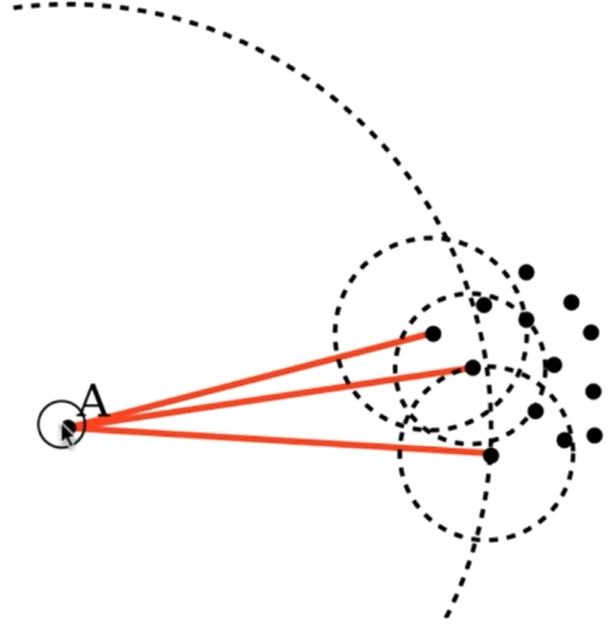


In [33]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42) # Oluşturalacak olan sayıların sabit olmasını sağlar
X_inliers = np.random.normal(70, 3, (100, 2))#Ortalaması 70, varyansı 3 olan 2 boyutlu bir veriseti oluşturduk

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] # r_ ifadesi index problemine takılmadan daha hızlı array oluşturmaya yarar

print("shape: ", X_inliers.shape)
print(X_inliers[:3, :2])

shape:  (200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [35]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2)) #uniform dağılımlı bir kitleden en düşük değeri 15 , en yüksek değeri 130, 20 değer 2 değişkenden oluşacak 

In [36]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [37]:
X = np.r_[X_inliers, X_outliers]

In [38]:
X[:3, :]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

#### LOF Skorlarının Hesaplanması

In [41]:
# Programlama anlamında bir instance oluşturduk
LOF = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [42]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [44]:
X_score = LOF.negative_outlier_factor_

In [45]:
X_score[:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [46]:
print("Mean: ", X_score.mean())
print("STD: ", X_score.std())

Mean:  -1.6850227435158005
STD:  2.140119050235338


In [47]:
np.sort(X_score)[:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

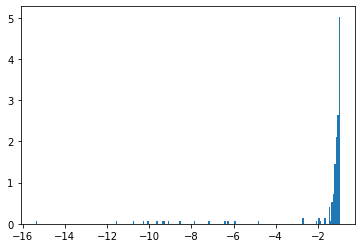

In [49]:
plt.hist(X_score, bins="auto", density=True)
plt.show()

#### Aykırı Gözlemlerin Görselleştirilmesi

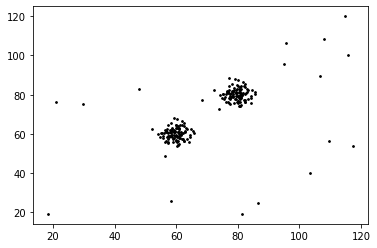

In [50]:
plt.scatter(X[:, 0], X[:, 1], color='k', s=3, label="Gözlem Birimleri");

In [51]:
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
# Her bir gözlem noktası için halkalar oluşturacağız. Bu halkalar skorları ifade edecek. 
# Halkaların boyutlarının hem tüm gözlemler göz önünde bulundurularak hem de kendi durumları göz önünde bulundurularak yapılmasını istiyoruz. 

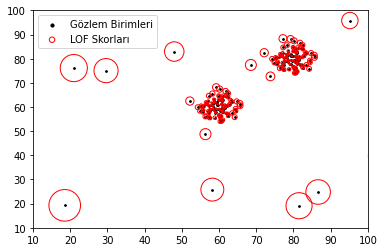

In [58]:
plt.scatter(X[:, 0], X[:, 1], color='k', s=3, label="Gözlem Birimleri");
plt.scatter(X[:, 0], X[:, 1], s=1000*radius, edgecolors="r", facecolors='none', label='LOF Skorları'); # s = markersize, facecolors= halkaların içini boş bıraktık

plt.xlim((10, 100))
plt.ylim((10, 100))

legend = plt.legend(loc="upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

#### Aykırı Gözlemlerin Yakalanması

In [59]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [60]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [61]:
esik_deger = np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [62]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [63]:
tf_vektor = (X_score > esik_deger)

In [65]:
X[(X_score > esik_deger)][:10] # AYKIRI OLMAYAN GÖZLEMLER

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [66]:
X[(X_score < esik_deger)] # AYKIRI GÖZLEMLER 

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [67]:
# DİĞER BİR YÖNTEM 
X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

#### Çok Değişkenli Aykırı Gözlemlerin Doldurulması

In [68]:
# silme
df = X[X_score > esik_deger]

In [70]:
df[:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [71]:
# Ortalama ile doldurma 
df_X = X.copy()

In [73]:
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [74]:
aykirilar = df_X[~tf_vektor]

In [75]:
aykirilar[:, :1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [76]:
aykirilar[:, :1] = np.mean(df_X[0])

In [77]:
aykirilar[:, :1]

array([[80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478]])

In [78]:
aykirilar[:, 1:2] = np.mean(df_X[1])

In [79]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [80]:
df_X[~tf_vektor] = aykirilar

In [81]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [ ]:
# AYKIRI DEĞERLERİ BASKILAMA İLE DEĞİŞTİRMEK 

In [82]:
df_X = X.copy()

In [87]:
df_X[X_score == esik_deger]

array([[58.19203955, 25.80792308]])

In [88]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [89]:
df_X[~tf_vektor]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

***
##  <font color=red>**Eksik Veri Analizi**</font> <a id="eksik_veri_analizi"></a>

***

**İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir.**